In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
pd.set_option('display.max_columns', 500)

# Narrative requirements

- Scatterplot
- Shapefile map with colors
- Histogram


# Narrative overview

## Slide 1
- the first slide should be something that demonstrates the abundance of the data we have available. 

> This could be a scatter plot, perhaps with the size of the appartment as the size of the circle and then some categorical variable for the colors. So brick houses would be red, and aluminium corregated sheets would be grey, etc.

> Here we'd have a discussion about the abundance of information required to make an educated desicion about buying property
> (As side by side plots) the right could be just a histogram of prices aggregated by district or some other fairly low-categorical count. 

##### Text:
Welcome to our data visualization project for the course *02806 Social data analysis and visualization*
        

The objective of this visualization is to explore real estate data from Washington DC and discover the hidden history and insights hiding within. 
  

## Slide 2
- The second slide contains information to give the reader and overview of the price range and distribution around the city
> On the left is a map with colored 
> (As side by side plots) If we have a map on the left

##### Text:
Let's begin our exploration by getting an overview of the price distribution in the capital. 

On the left you can see the median price of an appartment by each district and on the right you see the overall distribution of price in the city. Click on one of the cencus districts to see the price distribution compared to the rest of the city. 



## Slide 3


##### Text:
We've seen that the distribution of price is highly regional, but there is more to the pricing than meets the eye. 

If a neighbourhood has houses that are twice as expensive but four times as big, then you'd be getting a lot less for your money, even if you are spending less.

Let's see if there is a diference in the price per square foot for the apartments of the city. 

We see that neighbourhoods X and Y now look a lot less expensive compared to before. 


## Slide 4
We know that size isn't everything ;) it also matters how many rooms there are in the apartments. Here you can look at how the price of apartments differs by the number of rooms in each neighbourhood. 

You can pick if you want to look at the price per square foot or just the overall price. 
Select a number of rooms to see the distribution of price (or price per square foot) in each neigbourhood.


## Slide 5
We've seen that that size and number of rooms can affect the price of an appartment.

As a family man, I want to know which neighbourhood has the best prices for my family, and I suspect that other families would want to know the same. 

Let's see which neighbourhood has the best price (or price per square foot) for a given size family.


## Slide 6



In [ ]:
## Slide 1 (the first slide should be something that demonstrates the abundance of the data we have available)



In [84]:
df = pd.read_csv('../Data/DC_Properties.csv')

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
df_clean = pd.read_csv('../Data/Properties_clean.csv',index_col=0)

In [86]:
df_clean

,LATITUDE,LONGITUDE,PRICE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,AREA_M2
7,38.915408,-77.040129,1050000.0,3.0,1.0,4.0,1.0,1627.0,2011.0,39.0,0.0,2401.0,223.060415
8,38.915017,-77.039903,1430000.0,3.0,1.0,3.0,1.0,1424.0,2018.0,51.0,10.0,1488.0,138.239857
14,38.915038,-77.039716,1325000.0,3.0,1.0,3.0,1.0,1815.0,2011.0,44.0,11.0,2692.0,250.095226
16,38.915018,-77.039844,1240000.0,3.0,1.0,3.0,0.0,1424.0,2010.0,43.0,4.0,1662.0,154.405002
19,38.915019,-77.040138,592250.0,3.0,1.0,3.0,1.0,1424.0,2013.0,44.0,0.0,1598.0,148.459202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158948,38.911840,-77.019420,460000.0,2.0,0.0,2.0,0.0,573.0,2012.0,74.0,6.0,934.0,86.771523
158949,38.911840,-77.019420,550000.0,1.0,1.0,1.0,0.0,690.0,2015.0,77.0,9.0,1123.0,104.330215
158952,38.911840,-77.019420,399900.0,1.0,0.0,1.0,0.0,394.0,2015.0,77.0,9.0,639.0,59.365100
158953,38.911840,-77.019420,416000.0,1.0,0.0,2.0,0.0,506.0,2013.0,75.0,7.0,820.0,76.180567


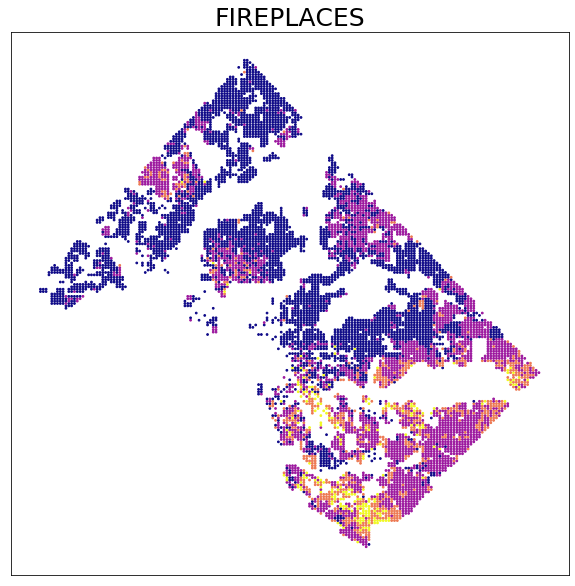

In [87]:
def scatter_categorical_map(df_raw,variable,title,factor):
    # Drop all other variables than the one of interest to save computation in rounding
    df_rounded = df_raw.loc[:,[variable,'LATITUDE','LONGITUDE']].dropna().copy()
    
    # Round the coordinates to the bin size requested
    df_rounded.loc[:,['LATITUDE','LONGITUDE']] = df_raw.loc[:,['LATITUDE','LONGITUDE']].round(factor).copy()
    
    df_tmp  = df_rounded.copy()
    var_by_loc = df_tmp.groupby(['LATITUDE','LONGITUDE']).agg(lambda x:x.value_counts().index[0]).loc[:,variable]
    var_by_loc_99 = var_by_loc[var_by_loc<np.quantile(var_by_loc.dropna(),0.99)]
    plt.figure(figsize=(10,10))
    plt.scatter(var_by_loc_99.index.get_level_values('LATITUDE'),
                var_by_loc_99.index.get_level_values('LONGITUDE'),
                c=var_by_loc_99,
               s=3,cmap='plasma')
    plt.title(title,fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
scatter_categorical_map(df,'FIREPLACES','FIREPLACES',3)

In [88]:

plt.show()

In [90]:
def bin_number(dataframe, n_bins):
    min_x,max_x = dataframe.loc[:,'LATITUDE'].min(),dataframe.loc[:,'LATITUDE'].max()
    min_y,max_y = dataframe.loc[:,'LONGITUDE'].min(),dataframe.loc[:,'LONGITUDE'].max()
    x_bins = np.linspace(min_x,max_x,n_bins)
    y_bins = np.linspace(min_y,max_y,n_bins)
    return x_bins,y_bins
#     plt.hist2d(df_clean.LATITUDE,df_clean.LONGITUDE,bins=[n_bins,n_bins])
#     plt.show()
    
x_bins,y_bins = bin_number(df_clean,50)

In [ ]:
# plt.scatter(x_bins,y_bins)

In [91]:
# Price map for specific number of bedrooms/rooms
# Mean, median, most common, min/max?
def price_map_with_constraints(dataframe, var, constraint, aggregate, factor):

    # Drop all other variables than the one of interest to save computation in rounding
    df_sub = dataframe.loc[:,[var,'LATITUDE','LONGITUDE','PRICE']].copy()
    
    # Constrain
    df_sub = df_sub.loc[constraint(df_sub.loc[:,var])]    
    
    # Round location values to factor
    df_sub.loc[:,['LATITUDE','LONGITUDE']] = df_sub.loc[:,['LATITUDE','LONGITUDE']].round(factor).copy()
    
    # Remove outliters for better color range
    df_sub = df_sub.loc[df_sub.PRICE < 1_000_000,:]
    
    # Bin by location and aggregate with function
    var_by_loc = df_sub.groupby(['LATITUDE','LONGITUDE']).agg(aggregate).loc[:,[var,'PRICE']]
    
    f,ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].scatter(var_by_loc.index.get_level_values('LATITUDE'),
                var_by_loc.index.get_level_values('LONGITUDE'),
                c=var_by_loc.loc[:,'PRICE'],vmin=0,vmax=1_000_000,
               s=3,cmap='plasma')
    ax[1].hist(var_by_loc.loc[:,'PRICE'],bins=100)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.show()



In [92]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

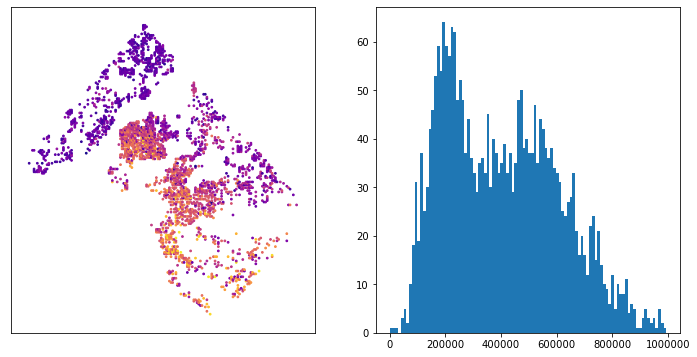

In [93]:
constr_1 = (lambda x: x == 2)
constr_2 = (lambda x: x == 3)
constr_3 = (lambda x: x == 4)

# Mean, median, most_common
agg_1 = (lambda x: np.mean(x))
agg_2 = (lambda x: np.median(x))
agg_3 = (lambda x: x.value_counts().index[0])
price_map_with_constraints(df_clean, 'BEDRM', constr_1, agg_1, 3)

In [94]:
df_clean.iloc[:3]

,LATITUDE,LONGITUDE,PRICE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,AREA_M2
7,38.915408,-77.040129,1050000.0,3.0,1.0,4.0,1.0,1627.0,2011.0,39.0,0.0,2401.0,223.060415
8,38.915017,-77.039903,1430000.0,3.0,1.0,3.0,1.0,1424.0,2018.0,51.0,10.0,1488.0,138.239857
14,38.915038,-77.039716,1325000.0,3.0,1.0,3.0,1.0,1815.0,2011.0,44.0,11.0,2692.0,250.095226


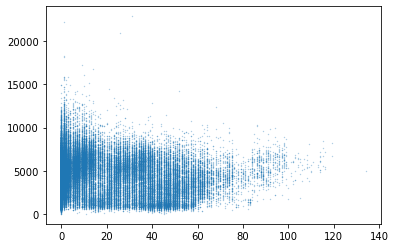

In [114]:
plt.scatter(df_clean.TSYR_RMDL,df_clean.PRICE/df_clean.AREA_M2,s=0.1,alpha=0.5)